In [38]:
import pandas as pd
import numpy as np

df = pd.read_excel("./xlsx/시차상관분석6Data.xlsx",index_col=0)
df = df.set_index("DateTime")

# 대비 계산
df['대비_irs_1Y'] = df['1Y_Mid_irs'] - df['1Y_Mid_irs'].shift(1) 
df['대비_irs_2Y'] = df['2Y_Mid_irs'] - df['2Y_Mid_irs'].shift(1) 
df['대비_irs_3Y'] = df['3Y_Mid_irs'] - df['3Y_Mid_irs'].shift(1) 
df['대비_irs_5Y'] = df['5Y_Mid_irs'] - df['5Y_Mid_irs'].shift(1) 
df['대비_irs_10Y'] = df['10Y_Mid_irs'] - df['10Y_Mid_irs'].shift(1) 

df['대비_crs_1Y'] = df['1Y_Mid_crs'] - df['1Y_Mid_crs'].shift(1)
df['대비_crs_2Y'] = df['2Y_Mid_crs'] - df['2Y_Mid_crs'].shift(1)
df['대비_crs_3Y'] = df['3Y_Mid_crs'] - df['3Y_Mid_crs'].shift(1)
df['대비_crs_5Y'] = df['5Y_Mid_crs'] - df['5Y_Mid_crs'].shift(1)
df['대비_crs_10Y'] = df['10Y_Mid_crs'] - df['10Y_Mid_crs'].shift(1)

df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['대비_ndf'] = df['Mid_ndf']-df['Mid_ndf'].shift(1)
df['스왑포인트_1M'] = df["M1_스왑포인트"]/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex', '종가_NDF_차이' ]]   

# 결측치 제거
df_1 = df_1.dropna()              

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 쓸 칼럼만 남기고 feature, target 분리해 각각 x,y 에 저장
x = df_1[[ '대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '스왑포인트_1M', '전일종가_ex', '종가_NDF_차이']]
y = df_1[['종가_ex']]

# 이건 이렇게 해야 밑에 코드 8번째 줄 columns에 들어갈 수 있다고 하네요!
x.feature = x.columns 
x.feature

# scaling 진행
from sklearn.preprocessing import StandardScaler

# MinMaxScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

C:\Users\hyeok\AppData\Local\Temp\ipykernel_24164\1960586329.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.feature = x.columns


,대비_irs_1Y,대비_irs_2Y,대비_irs_3Y,대비_irs_5Y,대비_irs_10Y,대비_crs_1Y,대비_crs_2Y,대비_crs_3Y,대비_crs_5Y,대비_crs_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,스왑포인트_1M,전일종가_ex,종가_NDF_차이
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-03,-0.848159,-0.732099,-0.562745,-0.628439,-0.403644,-0.205698,-0.364180,-0.462791,-1.872418,-3.115253,-1.133777,-0.324094,-1.890723,-1.798842,-0.217667,-0.125961,1.820638,-0.056282,-1.367171
2012-08-06,0.559997,0.481892,0.370922,0.415773,0.202253,-0.003456,-0.602348,-0.690892,-0.939341,-0.833148,0.563092,0.159979,0.000440,-0.000209,0.107313,0.123726,1.820638,-0.000487,1.602437
2012-08-07,0.278366,-0.003704,-0.002545,0.206931,0.404219,0.401029,0.350324,-0.006589,-1.639149,-1.663004,-0.568154,-0.001379,0.000440,-0.000209,-0.109340,-0.125961,1.911215,-0.104877,0.117633
2012-08-08,0.278366,0.481892,0.370922,0.415773,0.606184,0.198787,-0.006928,-0.006589,-0.472802,-0.833148,-0.568154,-0.324094,-0.539892,-0.514104,-0.109340,-0.125961,1.820638,-0.108476,-0.224108
2012-08-09,1.404890,1.453085,1.117855,1.042301,0.808150,1.816727,0.945744,0.905815,0.926814,0.826565,2.825583,0.966767,1.351270,1.284529,0.432293,0.747946,1.775350,-0.117475,-0.872236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129790,-1.946090,-1.309678,-1.881494,-2.221333,-1.621396,-2.150439,-1.603295,-2.572226,-2.285397,-1.133777,-0.969524,-1.890723,-2.312737,-0.109340,-0.625337,-0.896666,3.206786,0.860035
2022-07-26,-0.284897,-0.489301,-0.562745,-0.628439,-0.605609,0.198787,-0.721432,-0.690892,-0.472802,-0.418220,0.563092,-0.485451,-0.539892,-0.771052,0.107313,-0.001117,-0.987243,3.219385,0.753978
2022-07-27,-0.284897,-1.217695,-1.122944,-1.254966,-1.211506,0.198787,-0.245096,-0.234690,-0.239533,-0.210756,-0.002531,-0.485451,-1.350390,-1.541894,0.215640,-0.125961,-0.851378,3.109596,-0.565848


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.960690   대비_irs_1Y
1    19.497712   대비_irs_2Y
2     2.661563   대비_irs_3Y
3     6.471270   대비_irs_5Y
4     5.878681  대비_irs_10Y
5     2.665512   대비_crs_1Y
6     5.271707   대비_crs_2Y
7     3.831097   대비_crs_3Y
8     6.696835   대비_crs_5Y
9     3.715722  대비_crs_10Y
10    1.925701    대비_국고_1Y
11    1.254068    대비_국고_3Y
12    6.296340    대비_국고_5Y
13    5.056358   대비_국고_10Y
14    1.025199    대비_통안_1Y
15    1.115797    대비_통안_2Y
16    1.247545    스왑포인트_1M
17    1.192971     전일종가_ex
18    1.162083   종가_NDF_차이


In [41]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.452e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:17:06   Log-Likelihood:                -6904.9
No. Observations:                2458   AIC:                         1.385e+04
Df Residuals:                    2438   BIC:                         1.397e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.055
대비_irs_1Y      0.0303      0.257      0.118      0.906      -0.473       0.534
대비_irs_2Y      0.4393      0.359      1.223      0.221      -0.265       1.143
대비_irs_3Y      0.0617      0.133      0.465      0.642      -0.199       0.322
대비_irs_5Y     -0.0228      0.207     -0.110      0.912      -0.429       0.383
대비_irs_10Y    -0.5283      0.197     -2.679      0.007      -0.915      -0.142
대비_crs_1Y     -0.6870      0.133     -5.174      0.000      -0.947      -0.427
대비_crs_2Y      0.0520      0.187      0.279      0.781      -0.314       0.418
대비_crs_3Y     -0.2963      0.159     -1.862      0.063      -0.608       0.016
대비_crs_5Y     -0.3179      0.210     -1.511      0.131      -0.731       0.095
대비_crs_10Y     0.1187      0.157      0.757      0.449      -0.189       0.426
대비_국고_1Y      -0.0140      0.113     -0.124      0.901      -0.235       0.207
대비_국고_3Y      -0.1733      0.091     -1.903      0.057      -0.352       0.005
대비_국고_5Y       0.2574      0.204      1.261      0.207      -0.143       0.658
대비_국고_10Y     -0.0070      0.183     -0.038      0.970      -0.366       0.352
대비_통안_1Y      -0.0047      0.082     -0.057      0.954      -0.166       0.157
대비_통안_2Y       0.0295      0.086      0.343      0.732      -0.139       0.198
스왑포인트_1M      -1.1733      0.091    -12.916      0.000      -1.351      -0.995
전일종가_ex       55.7489      0.089    627.597      0.000      55.575      55.923
종가_NDF_차이     -3.9505      0.088    -45.060      0.000      -4.122      -3.779
==============================================================================
Omnibus:                      208.763   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              893.947
Skew:                           0.306   Prob(JB):                    7.62e-195
Kurtosis:                       5.891   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
x_scaled.drop(['대비_irs_2Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.931532   대비_irs_1Y
1     2.551145   대비_irs_3Y
2     5.804756   대비_irs_5Y
3     5.223022  대비_irs_10Y
4     2.662664   대비_crs_1Y
5     5.260265   대비_crs_2Y
6     3.828657   대비_crs_3Y
7     6.691565   대비_crs_5Y
8     3.715552  대비_crs_10Y
9     1.914954    대비_국고_1Y
10    1.248022    대비_국고_3Y
11    6.209873    대비_국고_5Y
12    5.042455   대비_국고_10Y
13    1.024839    대비_통안_1Y
14    1.115108    대비_통안_2Y
15    1.247525    스왑포인트_1M
16    1.192279     전일종가_ex
17    1.161921   종가_NDF_차이


In [43]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.588e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:17:07   Log-Likelihood:                -6905.6
No. Observations:                2458   AIC:                         1.385e+04
Df Residuals:                    2439   BIC:                         1.396e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.055
대비_irs_1Y      0.2746      0.161      1.703      0.089      -0.042       0.591
대비_irs_3Y      0.0947      0.130      0.729      0.466      -0.160       0.349
대비_irs_5Y      0.0584      0.196      0.298      0.766      -0.326       0.443
대비_irs_10Y    -0.4477      0.186     -2.409      0.016      -0.812      -0.083
대비_crs_1Y     -0.6923      0.133     -5.216      0.000      -0.953      -0.432
대비_crs_2Y      0.0627      0.187      0.336      0.737      -0.303       0.428
대비_crs_3Y     -0.3012      0.159     -1.893      0.058      -0.613       0.011
대비_crs_5Y     -0.3107      0.210     -1.477      0.140      -0.723       0.102
대비_crs_10Y     0.1200      0.157      0.765      0.444      -0.187       0.427
대비_국고_1Y      -0.0037      0.113     -0.033      0.974      -0.224       0.217
대비_국고_3Y      -0.1655      0.091     -1.822      0.069      -0.344       0.013
대비_국고_5Y       0.2866      0.203      1.414      0.157      -0.111       0.684
대비_국고_10Y     -0.0187      0.183     -0.103      0.918      -0.377       0.339
대비_통안_1Y      -0.0066      0.082     -0.080      0.936      -0.168       0.155
대비_통안_2Y       0.0321      0.086      0.374      0.709      -0.136       0.201
스왑포인트_1M      -1.1728      0.091    -12.910      0.000      -1.351      -0.995
전일종가_ex       55.7463      0.089    627.686      0.000      55.572      55.920
종가_NDF_차이     -3.9518      0.088    -45.073      0.000      -4.124      -3.780
==============================================================================
Omnibus:                      211.657   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.031
Skew:                           0.311   Prob(JB):                    9.01e-199
Kurtosis:                       5.919   Cond. No.                         7.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
x_scaled.drop(['대비_국고_10Y', '대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.844748   대비_irs_1Y
1     2.551052   대비_irs_3Y
2     5.803866   대비_irs_5Y
3     5.108473  대비_irs_10Y
4     2.662361   대비_crs_1Y
5     5.258649   대비_crs_2Y
6     3.827684   대비_crs_3Y
7     6.691009   대비_crs_5Y
8     3.714625  대비_crs_10Y
9     1.901653    대비_국고_1Y
10    1.247796    대비_국고_3Y
11    2.697168    대비_국고_5Y
12    1.114999    대비_통안_2Y
13    1.247511    스왑포인트_1M
14    1.192176     전일종가_ex
15    1.160739   종가_NDF_차이


In [45]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.914e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:17:09   Log-Likelihood:                -6905.6
No. Observations:                2458   AIC:                         1.385e+04
Df Residuals:                    2441   BIC:                         1.394e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.055
대비_irs_1Y      0.2769      0.159      1.737      0.083      -0.036       0.589
대비_irs_3Y      0.0948      0.130      0.730      0.465      -0.160       0.349
대비_irs_5Y      0.0581      0.196      0.297      0.767      -0.326       0.442
대비_irs_10Y    -0.4504      0.184     -2.451      0.014      -0.811      -0.090
대비_crs_1Y     -0.6922      0.133     -5.218      0.000      -0.952      -0.432
대비_crs_2Y      0.0630      0.186      0.338      0.736      -0.303       0.429
대비_crs_3Y     -0.3015      0.159     -1.895      0.058      -0.613       0.010
대비_crs_5Y     -0.3105      0.210     -1.476      0.140      -0.723       0.102
대비_crs_10Y     0.1197      0.157      0.764      0.445      -0.188       0.427
대비_국고_1Y      -0.0048      0.112     -0.042      0.966      -0.225       0.215
대비_국고_3Y      -0.1655      0.091     -1.822      0.069      -0.344       0.013
대비_국고_5Y       0.2706      0.134      2.027      0.043       0.009       0.532
대비_통안_2Y       0.0320      0.086      0.373      0.709      -0.136       0.200
스왑포인트_1M      -1.1728      0.091    -12.916      0.000      -1.351      -0.995
전일종가_ex       55.7462      0.089    627.967      0.000      55.572      55.920
종가_NDF_차이     -3.9520      0.088    -45.118      0.000      -4.124      -3.780
==============================================================================
Omnibus:                      211.784   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.230
Skew:                           0.311   Prob(JB):                    4.95e-199
Kurtosis:                       5.921   Cond. No.                         7.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
x_scaled.drop(['대비_국고_1Y',	'대비_crs_2Y'	], axis=1, inplace=True)
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.333e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:17:10   Log-Likelihood:                -6905.7
No. Observations:                2458   AIC:                         1.384e+04
Df Residuals:                    2443   BIC:                         1.393e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.055
대비_irs_1Y      0.2778      0.158      1.762      0.078      -0.031       0.587
대비_irs_3Y      0.0953      0.130      0.735      0.462      -0.159       0.350
대비_irs_5Y      0.0573      0.196      0.293      0.770      -0.327       0.441
대비_irs_10Y    -0.4511      0.183     -2.471      0.014      -0.809      -0.093
대비_crs_1Y     -0.6717      0.118     -5.704      0.000      -0.903      -0.441
대비_crs_3Y     -0.2863      0.152     -1.879      0.060      -0.585       0.012
대비_crs_5Y     -0.2848      0.196     -1.454      0.146      -0.669       0.099
대비_crs_10Y     0.1204      0.157      0.769      0.442      -0.186       0.427
대비_국고_3Y      -0.1658      0.090     -1.841      0.066      -0.342       0.011
대비_국고_5Y       0.2688      0.117      2.304      0.021       0.040       0.498
대비_통안_2Y       0.0316      0.085      0.371      0.711      -0.135       0.198
스왑포인트_1M      -1.1724      0.091    -12.917      0.000      -1.350      -0.994
전일종가_ex       55.7461      0.088    630.082      0.000      55.573      55.920
종가_NDF_차이     -3.9509      0.087    -45.162      0.000      -4.122      -3.779
==============================================================================
Omnibus:                      211.349   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              910.694
Skew:                           0.310   Prob(JB):                    1.76e-198
Kurtosis:                       5.917   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
x_scaled.drop(['대비_irs_5Y', '대비_통안_2Y'], axis=1, inplace=True)
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.891e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:17:11   Log-Likelihood:                -6905.8
No. Observations:                2458   AIC:                         1.384e+04
Df Residuals:                    2445   BIC:                         1.391e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.054
대비_irs_1Y      0.2998      0.143      2.093      0.036       0.019       0.581
대비_irs_3Y      0.1017      0.128      0.793      0.428      -0.150       0.353
대비_irs_10Y    -0.4269      0.157     -2.727      0.006      -0.734      -0.120
대비_crs_1Y     -0.6728      0.118     -5.721      0.000      -0.903      -0.442
대비_crs_3Y     -0.2868      0.152     -1.884      0.060      -0.585       0.012
대비_crs_5Y     -0.2828      0.196     -1.445      0.149      -0.667       0.101
대비_crs_10Y     0.1212      0.156      0.775      0.439      -0.186       0.428
대비_국고_3Y      -0.1638      0.090     -1.821      0.069      -0.340       0.013
대비_국고_5Y       0.2837      0.112      2.525      0.012       0.063       0.504
스왑포인트_1M      -1.1722      0.091    -12.921      0.000      -1.350      -0.994
전일종가_ex       55.7459      0.088    630.402      0.000      55.573      55.919
종가_NDF_차이     -3.9509      0.087    -45.200      0.000      -4.122      -3.779
==============================================================================
Omnibus:                      211.135   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              911.718
Skew:                           0.309   Prob(JB):                    1.05e-198
Kurtosis:                       5.919   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
x_scaled.drop(['대비_irs_3Y', '대비_crs_10Y'], axis=1, inplace=True)
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.671e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:17:11   Log-Likelihood:                -6906.4
No. Observations:                2458   AIC:                         1.383e+04
Df Residuals:                    2447   BIC:                         1.390e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.054
대비_irs_1Y      0.3420      0.131      2.602      0.009       0.084       0.600
대비_irs_10Y    -0.3911      0.151     -2.588      0.010      -0.687      -0.095
대비_crs_1Y     -0.6736      0.118     -5.731      0.000      -0.904      -0.443
대비_crs_3Y     -0.2821      0.152     -1.855      0.064      -0.580       0.016
대비_crs_5Y     -0.1797      0.151     -1.190      0.234      -0.476       0.117
대비_국고_3Y      -0.1623      0.090     -1.806      0.071      -0.339       0.014
대비_국고_5Y       0.2946      0.112      2.634      0.008       0.075       0.514
스왑포인트_1M      -1.1731      0.091    -12.934      0.000      -1.351      -0.995
전일종가_ex       55.7443      0.088    630.567      0.000      55.571      55.918
종가_NDF_차이     -3.9508      0.087    -45.211      0.000      -4.122      -3.779
==============================================================================
Omnibus:                      211.797   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.570
Skew:                           0.311   Prob(JB):                    2.53e-199
Kurtosis:                       5.923   Cond. No.                         4.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
x_scaled.drop(['대비_crs_5Y'], axis=1, inplace=True)
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.189e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:17:12   Log-Likelihood:                -6907.1
No. Observations:                2458   AIC:                         1.383e+04
Df Residuals:                    2448   BIC:                         1.389e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.054
대비_irs_1Y      0.3496      0.131      2.663      0.008       0.092       0.607
대비_irs_10Y    -0.4054      0.151     -2.690      0.007      -0.701      -0.110
대비_crs_1Y     -0.7098      0.114     -6.252      0.000      -0.932      -0.487
대비_crs_3Y     -0.3991      0.116     -3.444      0.001      -0.626      -0.172
대비_국고_3Y      -0.1642      0.090     -1.828      0.068      -0.340       0.012
대비_국고_5Y       0.2788      0.111      2.511      0.012       0.061       0.496
스왑포인트_1M      -1.1723      0.091    -12.925      0.000      -1.350      -0.994
전일종가_ex       55.7464      0.088    630.661      0.000      55.573      55.920
종가_NDF_차이     -3.9501      0.087    -45.200      0.000      -4.122      -3.779
==============================================================================
Omnibus:                      212.629   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              922.539
Skew:                           0.311   Prob(JB):                    4.71e-201
Kurtosis:                       5.936   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
x_scaled.drop(['대비_국고_3Y'], axis=1, inplace=True)
feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.832e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:17:13   Log-Likelihood:                -6908.8
No. Observations:                2458   AIC:                         1.384e+04
Df Residuals:                    2449   BIC:                         1.389e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.081    1.4e+04      0.000    1134.736    1135.055
대비_irs_1Y      0.3316      0.131      2.531      0.011       0.075       0.588
대비_irs_10Y    -0.3941      0.151     -2.616      0.009      -0.689      -0.099
대비_crs_1Y     -0.7114      0.114     -6.263      0.000      -0.934      -0.489
대비_crs_3Y     -0.4014      0.116     -3.462      0.001      -0.629      -0.174
대비_국고_5Y       0.2098      0.104      2.008      0.045       0.005       0.415
스왑포인트_1M      -1.1737      0.091    -12.934      0.000      -1.352      -0.996
전일종가_ex       55.7460      0.088    630.358      0.000      55.573      55.919
종가_NDF_차이     -3.9535      0.087    -45.228      0.000      -4.125      -3.782
==============================================================================
Omnibus:                      211.569   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.663
Skew:                           0.309   Prob(JB):                    2.42e-199
Kurtosis:                       5.924   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
x_scaled.columns

Index(['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_5Y',
       '스왑포인트_1M', '전일종가_ex', '종가_NDF_차이'],
      dtype='object')

In [52]:
df_scaled = pd.concat([x_scaled,y], axis=1)
df_scaled

,대비_irs_1Y,대비_irs_10Y,대비_crs_1Y,대비_crs_3Y,대비_국고_5Y,스왑포인트_1M,전일종가_ex,종가_NDF_차이,종가_ex
DateTime,,,,,,,,,
2012-08-03,-0.848159,-0.403644,-0.205698,-0.462791,-1.890723,1.820638,-0.056282,-1.367171,1134.8
2012-08-06,0.559997,0.202253,-0.003456,-0.690892,0.000440,1.820638,-0.000487,1.602437,1129.0
2012-08-07,0.278366,0.404219,0.401029,-0.006589,0.000440,1.911215,-0.104877,0.117633,1128.8
2012-08-08,0.278366,0.606184,0.198787,-0.006589,-0.539892,1.820638,-0.108476,-0.224108,1128.3
2012-08-09,1.404890,0.808150,1.816727,0.905815,1.351270,1.775350,-0.117475,-0.872236,1125.5
...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129790,-2.221333,-1.621396,-1.603295,-1.890723,-0.896666,3.206786,0.860035,1313.7
2022-07-26,-0.284897,-0.605609,0.198787,-0.690892,-0.539892,-0.987243,3.219385,0.753978,1307.6
2022-07-27,-0.284897,-1.211506,0.198787,-0.234690,-1.350390,-0.851378,3.109596,-0.565848,1313.3


In [53]:
train = df_scaled[0:1945]
test = df_scaled[1945:]

def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['대비_irs_1Y', '대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', '대비_국고_5Y',
       '스왑포인트_1M', '전일종가_ex', '종가_NDF_차이']
label_cols = ['종가_ex']

In [54]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 5)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

In [55]:
x_train

array([[[ 5.59996879e-01,  1.41404643e+00,  4.01029391e-01, ...,
         -8.14749063e-02, -4.86437850e-01, -2.00351545e+00],
        [ 2.78365712e-01,  6.06184230e-01, -3.45573131e-03, ...,
         -1.26763310e-01, -3.80248656e-01, -1.88755079e-01],
        [-2.84896622e-01,  2.87583166e-04, -2.05698292e-01, ...,
         -8.14749063e-02, -4.07245908e-01, -6.60121408e-01],
        [ 2.78365712e-01,  6.06184230e-01, -2.05698292e-01, ...,
         -1.72051713e-01, -3.47851952e-01,  5.87122431e-02],
        [ 2.78365712e-01,  1.01011533e+00,  4.01029391e-01, ...,
         -1.26763310e-01, -4.75638949e-01, -4.73451808e-02]],

       [[-3.26545495e-03,  6.06184230e-01, -2.05698292e-01, ...,
          1.27717719e+00, -1.12717265e+00, -6.36553092e-01],
        [-3.26545495e-03, -4.03643515e-01, -2.05698292e-01, ...,
          1.27717719e+00, -1.12897247e+00, -1.50858080e+00],
        [-3.26545495e-03, -2.01677966e-01,  8.05514512e-01, ...,
          1.23188879e+00, -1.08577687e+00,  6.47920

In [56]:
test_feature, test_label = make_dataset(test_feature, test_label, 5)
test_feature.shape, test_label.shape

((508, 5, 8), (508, 1))

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM


# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일: 모델학습을 위한 학습과정 설정단계
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
# print("\n Accuracy: %.4f" % model.evaluate(x_valid, y_valid))  

Epoch 1/200
97/97 [==============================] - ETA: 0s - loss: 1260284.2500 - mae: 1121.5541
Epoch 1: val_loss improved from inf to 1252077.00000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
97/97 [==============================] - 10s 77ms/step - loss: 1260284.2500 - mae: 1121.5541 - val_loss: 1252077.0000 - val_mae: 1118.0861
Epoch 2/200
95/97 [============================>.] - ETA: 0s - loss: 1007281.1250 - mae: 964.0506
Epoch 2: val_loss improved from 1252077.00000 to 619882.12500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
97/97 [==============================] - 8s 81ms/step - loss: 999526.1875 - mae: 957.5783 - val_loss: 619882.1250 - val_mae: 713.9823
Epoch 3/200
84/97 [========================>.....] - ETA: 0s - loss: 492179.2812 - mae: 609.5801
Epoch 3: val_loss improved from 619882.12500 to 191553.85938, saving model to .\
INFO:tensorflow:Assets written to: .\assets
97/97 [==============================] - 8s 83ms/step - loss: 460

16/16 [==============================] - 0s 3ms/step


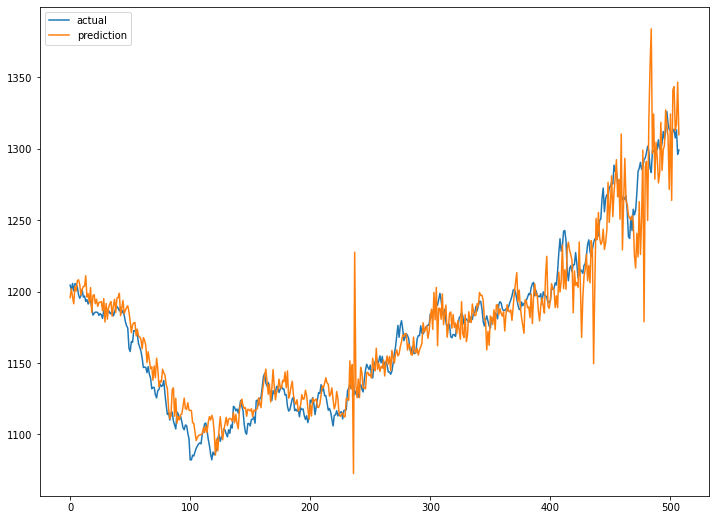

In [58]:
pred = model.predict(test_feature)

import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()